In [56]:
%matplotlib inline

from datetime import datetime, timedelta
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
# какая то странная библиотека, обычно используют sklearn.metrics
# import ml_metrics as metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [3]:
dataset = pd.read_csv('stocks.csv',';', index_col=['<DATE>'], parse_dates=['<DATE>'])
dataset.head()

Unnamed: 0 <TICKER>  <OPEN>  <CLOSE>
<DATE>                                          
2007-12-12           0     AFKS  43.000   41.449
2007-12-13           1     AFKS  41.200   40.896
2007-12-14           2     AFKS  40.200   41.797
2007-12-17           3     AFKS  41.890   41.900
2007-12-18           4     AFKS  41.001   41.400

In [4]:
del dataset['Unnamed: 0']
dataset.head()

<TICKER>  <OPEN>  <CLOSE>
<DATE>                              
2007-12-12     AFKS  43.000   41.449
2007-12-13     AFKS  41.200   40.896
2007-12-14     AFKS  40.200   41.797
2007-12-17     AFKS  41.890   41.900
2007-12-18     AFKS  41.001   41.400

In [5]:
pd.unique(dataset['<TICKER>'])

array(['AFKS', 'AFLT', 'AKRN', 'ALRS', 'BSPB', 'CHMF', 'DIXY', 'FEES',
       'GAZP', 'GCHE', 'GMKN', 'HYDR', 'IRAO', 'KMAZ', 'LKOH', 'LSRG',
       'MAGN', 'MFON', 'MSTT', 'MTSS', 'MVID', 'NLMK', 'NMTP', 'NVTK',
       'PHOR', 'PIKK', 'POLY', 'ROSN', 'RTKM', 'RUALR', 'SBER', 'SNGS',
       'SVAV', 'TATN', 'TRMK', 'TRNFP', 'UPRO', 'URKA', 'VTBR', 'YNDX'],
      dtype=object)

In [6]:
dataset['<OPEN>'][(dataset['<TICKER>'] == 'SBER') & (dataset.index > datetime(2008, 1, 1))]

<DATE>
2008-01-09    101.99
2008-01-10    102.07
2008-01-11    103.60
2008-01-14    104.28
2008-01-15    105.20
               ...  
2020-09-23    228.94
2020-09-24    228.07
2020-09-25    228.26
2020-09-26    228.26
2020-09-30    222.80
Name: <OPEN>, Length: 3019, dtype: float64

In [7]:
rosn_open = dataset['<OPEN>'][(dataset['<TICKER>'] == 'ROSN') & (dataset.index > datetime(2008, 1, 1))]
rosn_close = dataset['<CLOSE>'][(dataset['<TICKER>'] == 'ROSN')  & (dataset.index > datetime(2008, 1, 1))]
sber_open = dataset['<OPEN>'][(dataset['<TICKER>'] == 'SBER') & (dataset.index > datetime(2008, 1, 1))]
sber_close = dataset['<CLOSE>'][(dataset['<TICKER>'] == 'SBER') & (dataset.index > datetime(2008, 1, 1))]
urka_open = dataset['<OPEN>'][(dataset['<TICKER>'] == 'URKA') & (dataset.index > datetime(2008, 1, 1))]
urka_close = dataset['<CLOSE>'][(dataset['<TICKER>'] == 'URKA') & (dataset.index > datetime(2008, 1, 1))]
vtbr_open = dataset['<OPEN>'][(dataset['<TICKER>'] == 'VTBR') & (dataset.index > datetime(2008, 1, 1))]
vtbr_close = dataset['<CLOSE>'][(dataset['<TICKER>'] == 'VTBR') & (dataset.index > datetime(2008, 1, 1))]
yndx_open = dataset['<OPEN>'][(dataset['<TICKER>'] == 'YNDX') & (dataset.index > datetime(2008, 1, 1))]
yndx_close = dataset['<CLOSE>'][(dataset['<TICKER>'] == 'YNDX') & (dataset.index > datetime(2008, 1, 1))]

#  Временные графики для 5 компаний

## ROSN

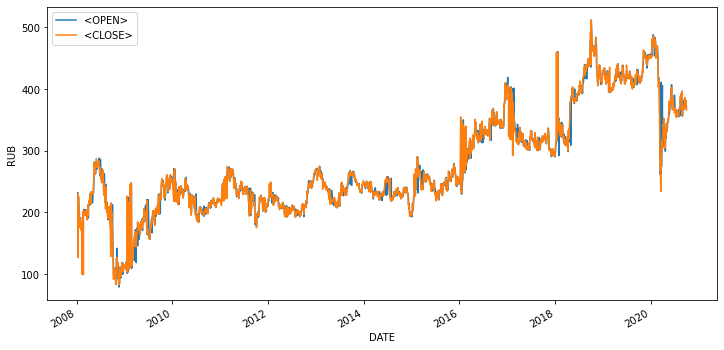

In [8]:
rosn_open.plot(figsize=(12,6), legend=True)
rosn_close.plot(figsize=(12,6), legend=True)
plt.xlabel('DATE')
plt.ylabel('RUB')
plt.show()

## SBER

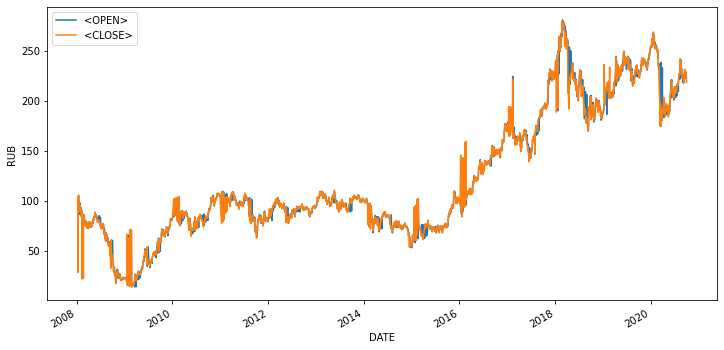

In [9]:
sber_open.plot(figsize=(12,6), legend=True)
sber_close.plot(figsize=(12,6), legend=True)
plt.xlabel('DATE')
plt.ylabel('RUB')
plt.show()

## URKA 

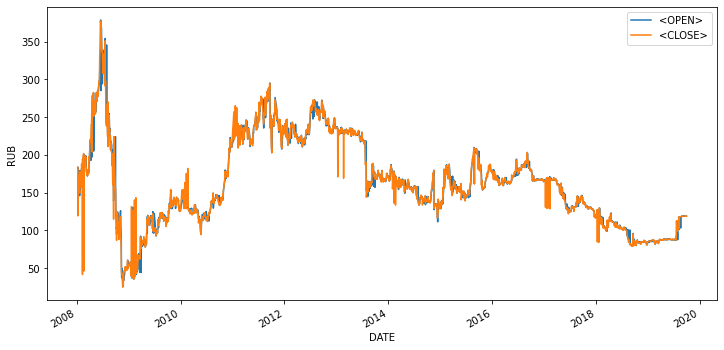

In [10]:
urka_open.plot(figsize=(12,6), legend=True)
urka_close.plot(figsize=(12,6), legend=True)
plt.xlabel('DATE')
plt.ylabel('RUB')
plt.show()

## VTBR 

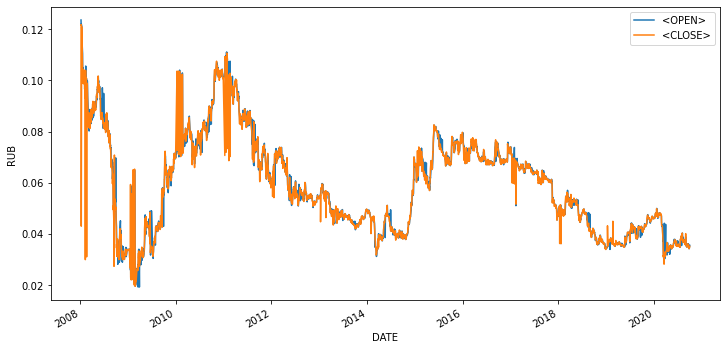

In [11]:
vtbr_open.plot(figsize=(12,6), legend=True)
vtbr_close.plot(figsize=(12,6), legend=True)
plt.xlabel('DATE')
plt.ylabel('RUB')
plt.show()

## YNDX 

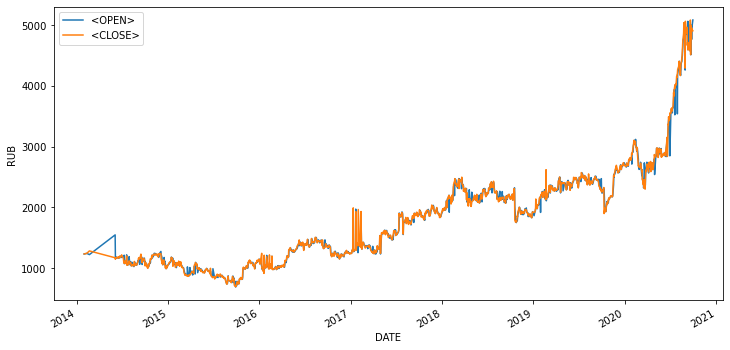

In [12]:
yndx_open.plot(figsize=(12,6), legend=True)
yndx_close.plot(figsize=(12,6), legend=True)
plt.xlabel('DATE')
plt.ylabel('RUB')
plt.show()

# Candle plot для этих же компаний

Для построения таких графиков необходимо больше информации - нужны цены откытия и закрытия, а так же HIGH и LOW

In [13]:
dataset_candle = pd.read_csv('stocks_forcandle.csv',';', index_col=['<DATE>'], parse_dates=['<DATE>'])
del dataset_candle['Unnamed: 0']
dataset_candle.sample(5)

<TICKER>    <OPEN>  <CLOSE>    <HIGH>   <LOW>
<DATE>                                                  
2020-06-23     NLMK  138.0600   138.84  140.1400  137.96
2014-03-07     RTKM   89.4800    88.24   90.5500   88.03
2008-10-16     AFLT   60.0000    63.29   63.2900   52.00
2012-11-30     UPRO    2.2889     2.36    2.3778    2.28
2018-02-27     MSTT  149.3000   148.50  150.9000  148.30

In [14]:
# Исправил множественное задание рядов по компаниям на определение через словарь
company_names = ['ROSN', 'SBER', 'URKA', 'VTBR', 'YNDX']
company_keys = ['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']
d = dict()
for cn in company_names:
    d[cn] = dict()
    for ck in company_keys: 
        d[cn][ck] = dataset_candle[ck][(dataset_candle['<TICKER>'] == cn) & (dataset_candle.index > datetime(2008, 1, 1))]

In [15]:
rosn_candle = go.Figure(data=[go.Candlestick(x=d['ROSN']['<OPEN>'].index,
                open=d['ROSN']['<OPEN>'],
                high=d['ROSN']['<HIGH>'],
                low=d['ROSN']['<LOW>'],
                close=d['ROSN']['<CLOSE>'])])
rosn_candle.update_layout(title='ROSN', title_x = 0.5)
rosn_candle.show()

## Как в статье на хабре

<AxesSubplot:xlabel='<DATE>'>

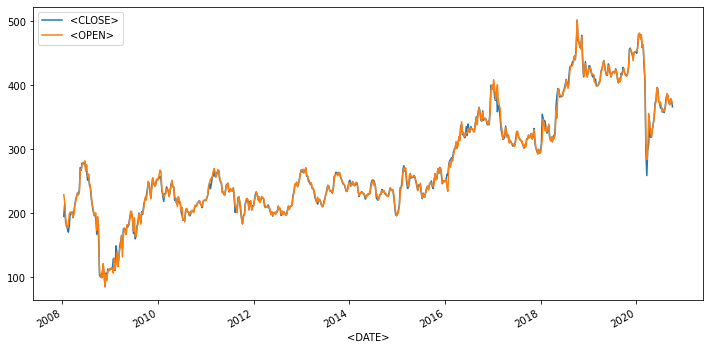

In [16]:
rosn_open2 = rosn_open
rosn_open = rosn_open.resample('W').mean().dropna()
rosn_close = rosn_close.resample('W').mean().dropna()
rosn_close.plot(figsize=(12,6), legend=True)
rosn_open.plot(figsize=(12,6), legend=True)

<AxesSubplot:xlabel='<DATE>'>

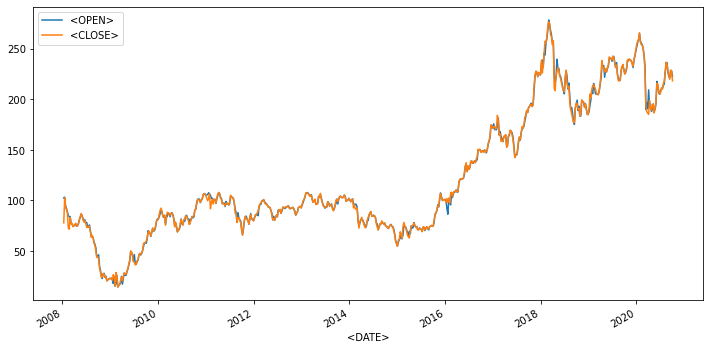

In [17]:
sber_open1 = sber_open.resample('W').mean().dropna()
sber_close1 = sber_close.resample('W').mean().dropna()
sber_open1.plot(figsize=(12,6),legend=True)
sber_close1.plot(figsize=(12,6), legend=True)

Ряд можно назвать стационарным только на определенных участках, например с 2010 по 2013 год

count    661.000000
mean     276.538787
std       83.781269
min       84.698000
25%      220.476000
50%      247.520000
75%      328.983333
max      500.610000
Name: <OPEN>, dtype: float64

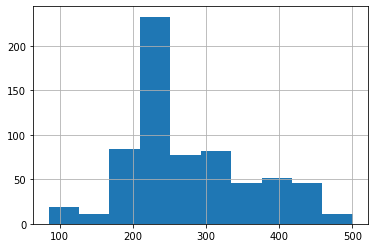

In [18]:
itog_rosn = rosn_open.describe()
rosn_open.hist()
itog_rosn

## Коэфициент вариации

In [19]:
print(f"V = {itog_rosn['std']/itog_rosn['mean'] : .5f}")

V =  0.30296


## Тест Харке-Бера

Используется для определения нормальности распределения

In [20]:
row =  ['JB', 'p-value', 'skew', 'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(rosn_open)
a = np.vstack([jb_test])
itog_rosn = SimpleTable(a, row)
print(itog_rosn)

        JB               p-value               skew             kurtosis     
-----------------------------------------------------------------------------
37.82027920347457 6.129580019037572e-09 0.5582454378510825 2.6441202519119513
-----------------------------------------------------------------------------


* Чем ближе распределение ошибок к нормальному, тем меньше статистика Харке—Бера отличается от нуля. При достаточно большом значении статистики p-value будет мало, и тогда будет основание отвергнуть нулевую гипотезу (статистика попала в «хвост» распределения).
* skew - коэффициент ассиметрии. Неформально говоря, коэффициент асимметрии положителен, если правый хвост распределения длиннее левого, и отрицателен в противном случае. Если распределение симметрично относительно математического ожидания, то его коэффициент асимметрии равен нулю.
* kurtosis - Коэффицие́нт эксце́сса (коэффициент островершинности) в теории вероятностей — мера остроты пика распределения случайной величины.Он отрицателен, если пик распределения около математического ожидания острый, и положителен, если пик очень гладкий.

## Обобщенный тест Дики-Фуллера

In [21]:
test = sm.tsa.adfuller(rosn_open)
print('adf: ', test[0]) 
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -1.7679208477973576
p-value:  0.39650033931397843
Critical values:  {'1%': -3.4403119951958754, '5%': -2.8659357770630662, '10%': -2.5691109142928195}
есть единичные корни, ряд не стационарен


Подтвердилось предположение о нестационарности ряда

In [22]:
rosn_open_diff1 = rosn_open.diff(periods=1).dropna()

In [23]:
test = sm.tsa.adfuller(rosn_open_diff1)
print('adf: ', test[0]) 
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -23.884184172941833
p-value:  0.0
Critical values:  {'1%': -3.4403119951958754, '5%': -2.8659357770630662, '10%': -2.5691109142928195}
единичных корней нет, ряд стационарен


Ряд первых разностей приблизился к стационарному

In [24]:
m = rosn_open_diff1.index[len(rosn_open_diff1.index) // 2 + 1]
r1 = sm.stats.DescrStatsW(rosn_open_diff1[m:])
r2 = sm.stats.DescrStatsW(rosn_open_diff1[:m])
print('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

p-value:  0.6965152774750727


Здесь код с хабра не работал, пришлось вместо / 2 сделать // 2

Высокое (как определить насколько?) p-value дает нам возможность утверждать, что нулевая гипотеза о равенстве средних верна, что свидетельствует о стационарности ряда. Осталось убедиться в отсутствии тренда для этого построим график нашего нового ряда:

<AxesSubplot:xlabel='<DATE>'>

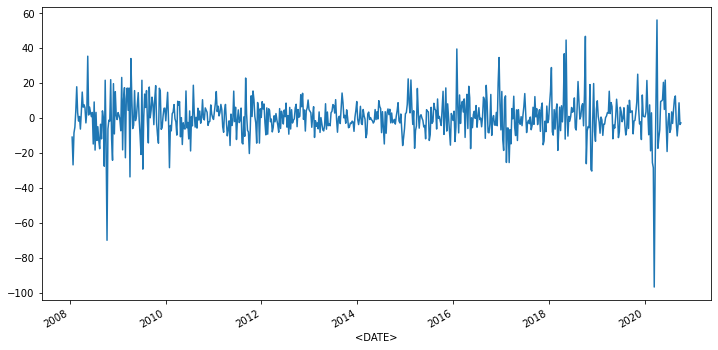

In [25]:
rosn_open_diff1.plot(figsize=(12,6))

Тренд отсутствует. Ряд первых разностей является стационарным, а исходный ряд — интегрированным рядом первого порядка.

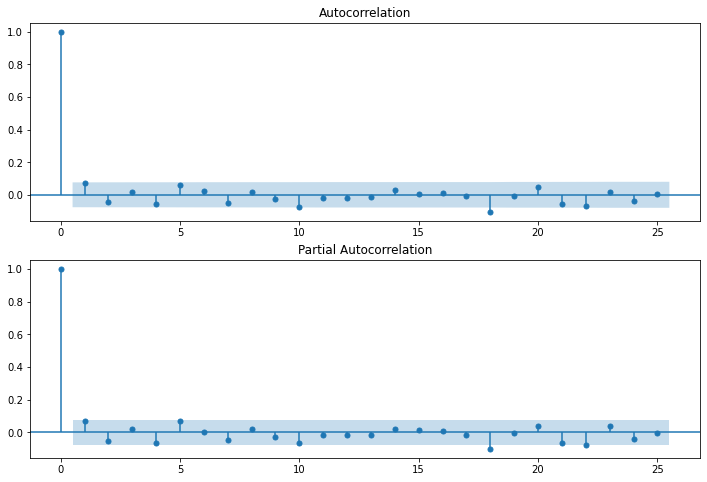

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(rosn_open_diff1.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(rosn_open_diff1, lags=25, ax=ax2)

Тут тоже при копировании кода с хабра ошибка - было ig первой строкой

* ACF
Сильно отличен от нуля только один лаг - первый, соответственно q = 1
* PACF 
Так же сильно отличен от нуля только 1 лаг, p = 1

In [27]:
# лучше чтобы не листать потом портянки данных выводить несколько первых или рандомных записей
rosn_open[rosn_open.index > datetime(2017, 1, 8)].sample(5)

<DATE>
2017-04-02    321.050000
2020-03-29    299.630000
2019-02-10    416.008333
2018-09-30    453.991667
2017-03-05    337.950000
Name: <OPEN>, dtype: float64

In [28]:
rosn_reindex = rosn_open2.reindex(pd.date_range(start=rosn_open2.index[0], end=rosn_open2.index[-1], freq='D'))
rosn_reindex.fillna(method='ffill', inplace=True)
rosn_reindex.head()

2008-01-09    231.99
2008-01-10    228.77
2008-01-11    225.99
2008-01-12    225.99
2008-01-13    225.99
Freq: D, Name: <OPEN>, dtype: float64

In [29]:
src_data_model = rosn_reindex[:'2020-09-06']
model = sm.tsa.ARIMA(src_data_model, order=(1,1,1), freq='D').fit(full_output=False, disp=0)

D:\Python381\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


D:\Python381\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note

In [30]:
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.<OPEN>   No. Observations:                 4624
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -16874.628
Method:                       css-mle   S.D. of innovations              9.304
Date:                Thu, 22 Oct 2020   AIC                          33757.256
Time:                        23:01:43   BIC                          33783.012
Sample:                    01-10-2008   HQIC                         33766.319
                         - 09-06-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0326      0.060      0.546      0.585      -0.085       0.150
ar.L1.D.<OPEN>     0.5974      0.024     24.661      0.000       0.550       0.645
ma.L1.D.<OPEN>    -0.8243      0.017

In [31]:
q_test = sm.tsa.stattools.acf(model.resid, qstat=True) #свойство resid, хранит остатки модели, qstat=True, означает что применяем указынный тест к коэф-ам
print(pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))

        Q-stat       p-value
0     0.003462  9.530833e-01
1     4.875750  8.734627e-02
2    17.561415  5.416327e-04
3    22.669492  1.474051e-04
4    28.175556  3.363241e-05
5    30.518345  3.132076e-05
6    32.733570  2.967969e-05
7    33.350359  5.324858e-05
8    46.619106  4.620645e-07
9   111.327525  2.879889e-19
10  116.230230  1.036857e-19
11  116.254283  3.441441e-19
12  116.461855  1.004660e-18
13  116.507033  3.031873e-18
14  116.645293  8.451155e-18
15  117.249036  1.853321e-17
16  123.032857  4.068067e-18
17  125.144314  4.457351e-18
18  127.615142  4.115802e-18
19  142.632003  1.600998e-20
20  183.112840  7.349180e-28
21  183.527159  1.836549e-27
22  185.168519  2.605554e-27
23  185.169510  7.515584e-27
24  185.852404  1.572788e-26
25  185.855920  4.351050e-26
26  188.764436  3.343724e-26
27  192.224700  2.009577e-26
28  192.725046  4.308246e-26
29  193.046036  9.821959e-26
30  195.030122  1.085120e-25
31  195.830735  1.965416e-25
32  196.052966  4.488333e-25
33  203.478321

D:\Python381\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning:

The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.

D:\Python381\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



In [32]:
pred = model.predict('2020-09-07','2020-09-30', typ='levels')
trn = rosn_reindex['2020-09-07':]
r2 = r2_score(trn, pred)
print('R^2: %1.2f' % r2)

R^2: 0.07


In [33]:
# стандартные метрики
mse(trn, pred, squared=True)

27.012058105172553

In [34]:
mae(trn,pred)

4.4550865901390395

<AxesSubplot:>

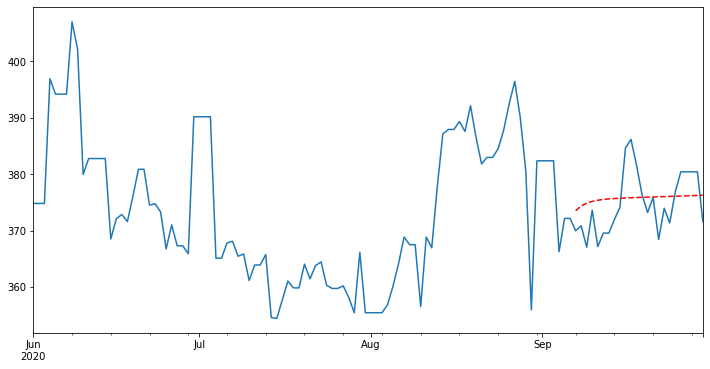

In [35]:
rosn_reindex['2020-06-01':].plot(figsize=(12,6))
pred.plot(style='r--')

In [36]:
rosn_reindex2 = rosn_open2.reindex(pd.date_range(start=rosn_open2.index[0], end=rosn_open2.index[-1], freq='D'))
rosn_reindex2 = pd.DataFrame({'OPEN':rosn_reindex2, 'DATE':rosn_reindex2.index})
rosn_reindex2 = rosn_reindex2.dropna()
rosn_reindex2.index = pd.RangeIndex(len(rosn_reindex2))
rosn_reindex2

OPEN       DATE
0     231.99 2008-01-09
1     228.77 2008-01-10
2     225.99 2008-01-11
3     222.95 2008-01-14
4     224.85 2008-01-15
...      ...        ...
3014  374.00 2020-09-23
3015  371.40 2020-09-24
3016  376.85 2020-09-25
3017  380.45 2020-09-26
3018  371.60 2020-09-30

[3019 rows x 2 columns]

In [37]:
rosn_reindex2.iloc[:, 0]

0       231.99
1       228.77
2       225.99
3       222.95
4       224.85
         ...  
3014    374.00
3015    371.40
3016    376.85
3017    380.45
3018    371.60
Name: OPEN, Length: 3019, dtype: float64

In [38]:
src_data_model = rosn_reindex2.iloc[:2900, 0]
model = sm.tsa.ARIMA(src_data_model, order=(1,1,1)).fit(full_output=False, disp=0)

D:\Python381\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


D:\Python381\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note

In [39]:
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.OPEN   No. Observations:                 2899
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10999.650
Method:                       css-mle   S.D. of innovations             10.754
Date:                Thu, 22 Oct 2020   AIC                          22007.300
Time:                        23:01:44   BIC                          22031.188
Sample:                             1   HQIC                         22015.907
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0295      0.107      0.276      0.782      -0.180       0.239
ar.L1.D.OPEN    -0.0870      0.036     -2.393      0.017      -0.158      -0.016
ma.L1.D.OPEN    -0.4197      0.033    -12.84

In [40]:
q_test = sm.tsa.stattools.acf(model.resid, qstat=True) #свойство resid, хранит остатки модели, qstat=True, означает что применяем указынный тест к коэф-ам
print(pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))

       Q-stat   p-value
0    0.003361  0.953769
1    0.248234  0.883277
2    1.433747  0.697644
3    2.152202  0.707789
4    2.390993  0.792815
5    8.665053  0.193310
6   12.380790  0.088711
7   12.896505  0.115460
8   12.936265  0.165511
9   14.746213  0.141592
10  16.969476  0.108782
11  26.870811  0.008065
12  26.877816  0.012929
13  49.651531  0.000007
14  49.709087  0.000013
15  55.470025  0.000003
16  56.308327  0.000004
17  56.386311  0.000008
18  56.773065  0.000012
19  57.076373  0.000020
20  59.228969  0.000017
21  59.254134  0.000029
22  59.885630  0.000040
23  60.849560  0.000048
24  60.907937  0.000078
25  62.019790  0.000089
26  67.489706  0.000025
27  67.537154  0.000041
28  68.510246  0.000048
29  71.806266  0.000028
30  72.679059  0.000034
31  72.723966  0.000052
32  73.305089  0.000069
33  75.629151  0.000053
34  76.066104  0.000072
35  76.397513  0.000099
36  77.074325  0.000123
37  77.150802  0.000178
38  77.220398  0.000257
39  78.429348  0.000269


D:\Python381\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning:

The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.

D:\Python381\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



In [41]:
pred = model.predict(2900, 3018, typ='levels')
trn = rosn_reindex2.iloc[2900:, 0]
r2 = r2_score(trn, pred)
print('R^2: %1.2f' % r2)

R^2: -7.32


In [42]:
mse(trn, pred,squared=False)

53.27588829956116

In [43]:
mae(trn,pred)

50.677139527201696

<AxesSubplot:>

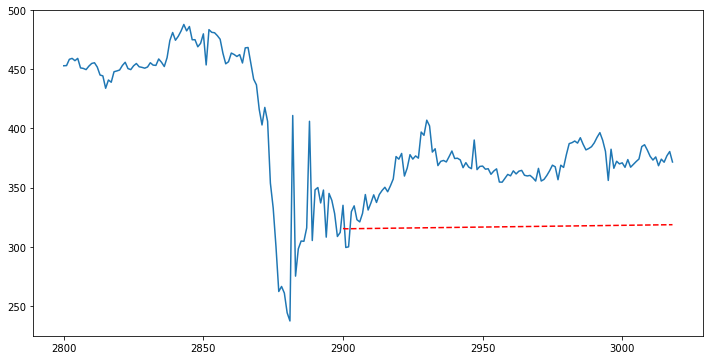

In [44]:
rosn_reindex2.iloc[2800:, 0].plot(figsize=(12,6))
pred.plot(style='r--')

In [59]:
def func_ARIMA(some_df):
    data_reindex2 = some_df.reindex(pd.date_range(start=some_df.index[0], end=some_df.index[-1], freq='D'))
    data_reindex2 = pd.DataFrame({'OPEN':data_reindex2, 'DATE':data_reindex2.index})
    data_reindex2 = data_reindex2.dropna()
    data_reindex2.index = pd.RangeIndex(len(data_reindex2))
    
    print('Тест Дики-Фуллера')
    i_d = 0
    df_for_fuller = data_reindex2.iloc[:, 0].copy(deep=True)
    while True:
        test_fuller = sm.tsa.adfuller(df_for_fuller)
        print('adf: ', test_fuller[0]) 
        print('p-value: ', test_fuller[1])
        print('Critical values: ', test_fuller[4])
        if test_fuller[0]> test_fuller[4]['5%']: 
            print('есть единичные корни, ряд не стационарен \n')
            some_df_dif = df_for_fuller.diff(periods=i_d + 1).dropna()
            i_d += 1
            df_for_fuller = some_df_dif.copy(deep=True)
        else:
            print('единичных корней нет, ряд стационарен \n')
            print(f'd = {i_d} \n')
            break
    m = some_df_dif.index[len(some_df_dif.index) // 2 + 1]
    r1 = sm.stats.DescrStatsW(some_df_dif[m:])
    r2 = sm.stats.DescrStatsW(some_df_dif[:m])
    print('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])
    
    print('\nУбеждаемся в отсутствии трендов \n')
    some_df_dif.plot(figsize=(12,6))
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(some_df_dif.values.squeeze(), lags=25, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(some_df_dif, lags=25, ax=ax2)
    plt.show()
    
    q_arima = int(input('Количество лагов сильно отличных от 0 на первом графике: '))
    p_arima = int(input('Количество лагов сильно отличных от 0 на втором графике: '))
    d_arima = i_d
    
    #in1 = data_reindex2[data_reindex2['DATE'] == '2020-08-31'].index[0]
    delta = timedelta(days=45)
    in1 = data_reindex2[data_reindex2['DATE'] == (data_reindex2['DATE'].iloc[-1] - delta)].index[0]
    print(f'in1 = {in1}')
    in2 = data_reindex2.shape[0] - 1 
    print(f'in2 = {in2}')
    src_data_model = data_reindex2.iloc[:in1, 0]
    model = sm.tsa.ARIMA(src_data_model, order=(p_arima,d_arima,q_arima)).fit(full_output=False, disp=0)
    print(model.summary())
    q_test = sm.tsa.stattools.acf(model.resid, qstat=True)
    print(pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))
    pred = model.predict(in1, in2, typ='levels')
    trn = data_reindex2.iloc[in1:, 0]
    r2 = r2_score(trn, pred)
    print('R^2: %1.2f' % r2)
    print(f'MSE = {mse(trn, pred,squared=False)}')
    print(f'MAE = {mae(trn,pred)}')
    data_reindex2.iloc[in1 - 50:, 0].plot(figsize=(12,6))
    pred.plot(style='r--')

Тест Дики-Фуллера
adf:  -1.8027255844719026
p-value:  0.3791093586681651
Critical values:  {'1%': -3.4325294533972204, '5%': -2.862502941845959, '10%': -2.567282599200112}
есть единичные корни, ряд не стационарен 

adf:  -15.285550935986462
p-value:  4.51618519302561e-28
Critical values:  {'1%': -3.4325294533972204, '5%': -2.862502941845959, '10%': -2.567282599200112}
единичных корней нет, ряд стационарен 

d = 1 

p-value:  0.8724802074419951

Убеждаемся в отсутствии трендов 



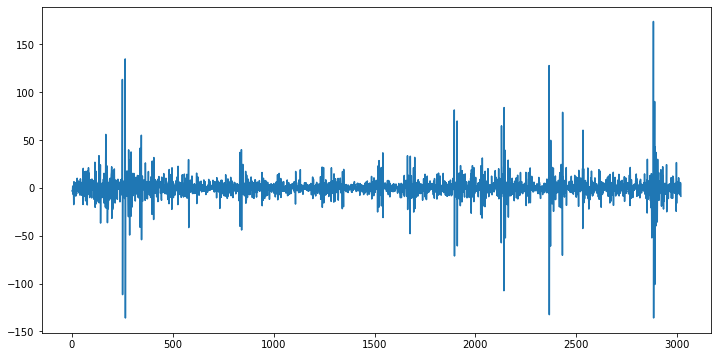

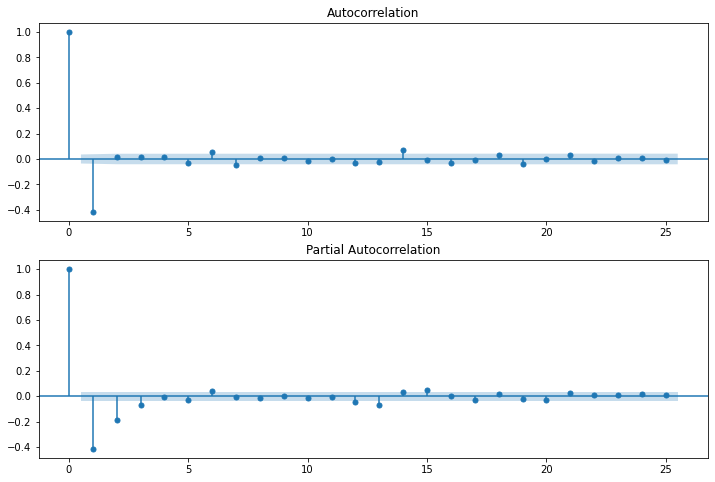

Количество лагов сильно отличных от 0 на первом графике: 2
Количество лагов сильно отличных от 0 на втором графике: 2
in1 = 2996
in2 = 3018


D:\Python381\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


D:\Python381\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note

                             ARIMA Model Results                              
Dep. Variable:                 D.OPEN   No. Observations:                 2995
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -11352.208
Method:                       css-mle   S.D. of innovations             10.712
Date:                Thu, 22 Oct 2020   AIC                          22716.416
Time:                        23:01:49   BIC                          22752.444
Sample:                             1   HQIC                         22729.376
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0464      0.109      0.427      0.669      -0.166       0.259
ar.L1.D.OPEN     0.2267      0.542      0.419      0.676      -0.835       1.288
ar.L2.D.OPEN    -0.0322      0.062     -0.52

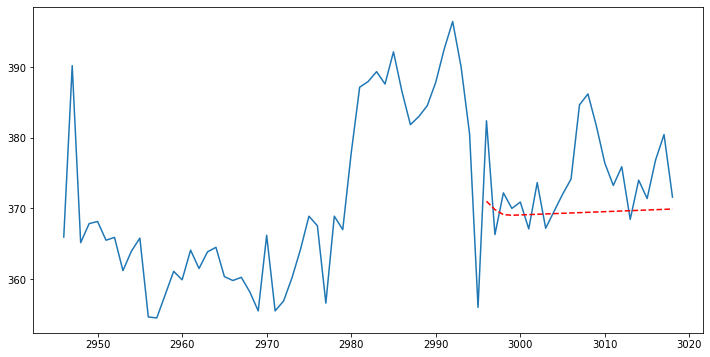

In [46]:
ex_df = d['ROSN']['<OPEN>']
func_ARIMA(ex_df)

Тест Дики-Фуллера
adf:  -0.6143553668589222
p-value:  0.8677051977377337
Critical values:  {'1%': -3.4325287272587293, '5%': -2.8625026211355227, '10%': -2.5672824284575735}
есть единичные корни, ряд не стационарен 

adf:  -15.400517003812283
p-value:  3.2198284085036953e-28
Critical values:  {'1%': -3.4325287272587293, '5%': -2.8625026211355227, '10%': -2.5672824284575735}
единичных корней нет, ряд стационарен 

d = 1 

p-value:  0.6324131135490831

Убеждаемся в отсутствии трендов 



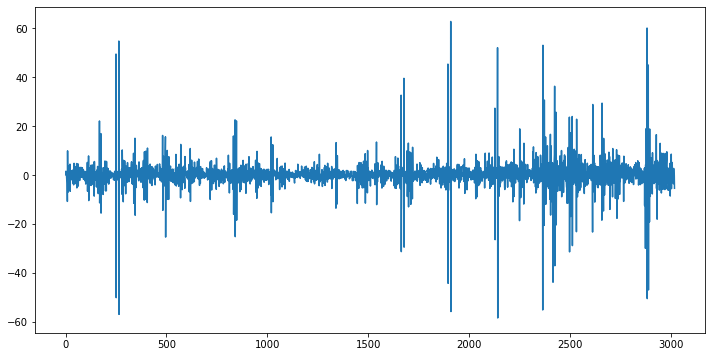

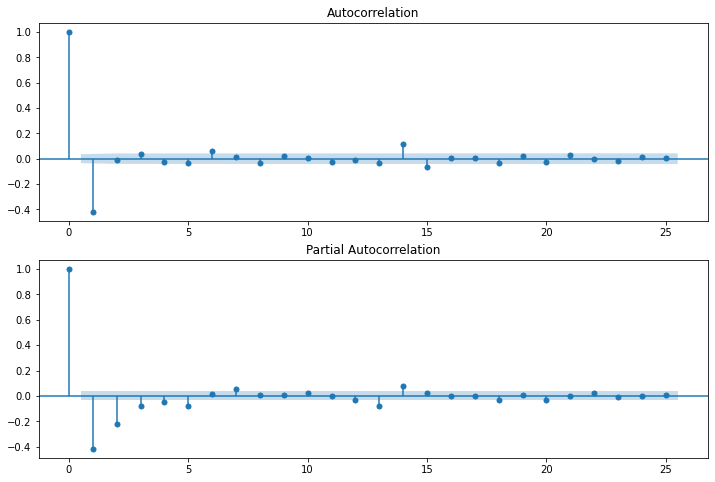

Количество лагов сильно отличных от 0 на первом графике: 2
Количество лагов сильно отличных от 0 на втором графике: 2
in1 = 2996
in2 = 3018


D:\Python381\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


D:\Python381\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note

                             ARIMA Model Results                              
Dep. Variable:                 D.OPEN   No. Observations:                 2995
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9209.911
Method:                       css-mle   S.D. of innovations              5.239
Date:                Thu, 22 Oct 2020   AIC                          18431.822
Time:                        23:01:53   BIC                          18467.850
Sample:                             1   HQIC                         18444.782
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0408      0.046      0.879      0.379      -0.050       0.132
ar.L1.D.OPEN    -0.4323      0.296     -1.459      0.145      -1.013       0.149
ar.L2.D.OPEN    -0.0579      0.034     -1.69

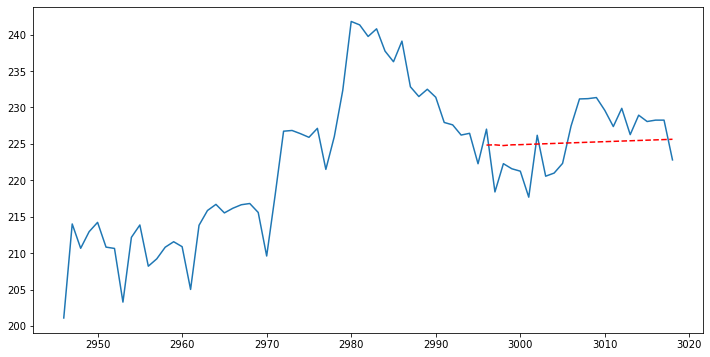

In [47]:
ex_df = d['SBER']['<OPEN>']
func_ARIMA(ex_df)

Тест Дики-Фуллера
adf:  2.5829674607008557
p-value:  0.9990718100573726
Critical values:  {'1%': -3.4347111923936393, '5%': -2.863466189518188, '10%': -2.5677954794761004}
есть единичные корни, ряд не стационарен 

adf:  -9.941600262506249
p-value:  2.6553539170761066e-17
Critical values:  {'1%': -3.4347111923936393, '5%': -2.863466189518188, '10%': -2.5677954794761004}
единичных корней нет, ряд стационарен 

d = 1 

p-value:  0.40648458986402236

Убеждаемся в отсутствии трендов 



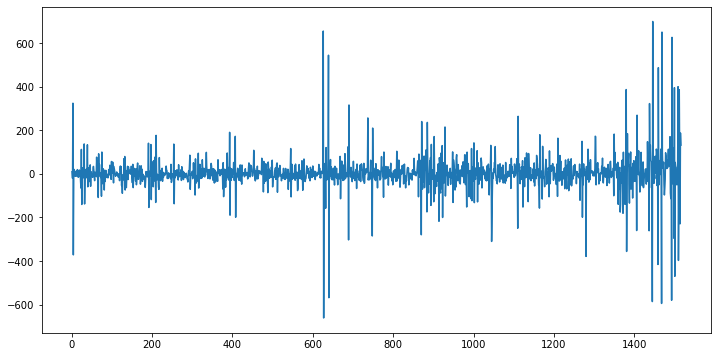

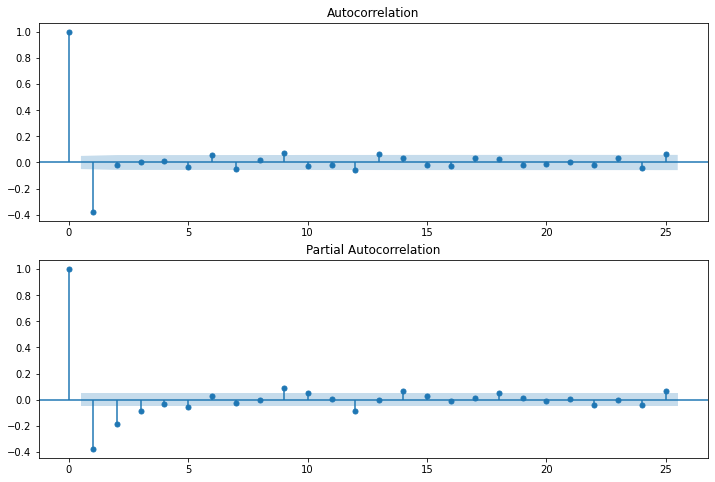

Количество лагов сильно отличных от 0 на первом графике: 2
Количество лагов сильно отличных от 0 на втором графике: 2
in1 = 1494
in2 = 1516


D:\Python381\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


D:\Python381\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note

                             ARIMA Model Results                              
Dep. Variable:                 D.OPEN   No. Observations:                 1493
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8498.426
Method:                       css-mle   S.D. of innovations             71.748
Date:                Thu, 22 Oct 2020   AIC                          17008.851
Time:                        23:02:40   BIC                          17040.703
Sample:                             1   HQIC                         17020.720
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1961      1.053      2.085      0.037       0.132       4.260
ar.L1.D.OPEN    -0.9559      0.066    -14.380      0.000      -1.086      -0.826
ar.L2.D.OPEN     0.0190      0.065      0.29

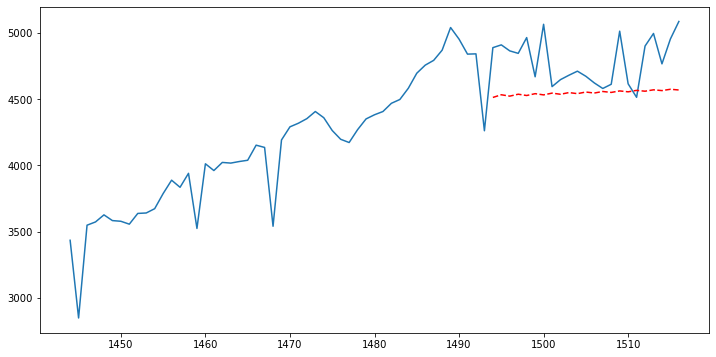

In [48]:
ex_df = d['YNDX']['<OPEN>']
func_ARIMA(ex_df)

## Построил ARIMA для SBER 2014-2019

Тест Дики-Фуллера
adf:  -0.39935419834085134
p-value:  0.9102065472902028
Critical values:  {'1%': -3.434992974078597, '5%': -2.863590546293418, '10%': -2.567861701478863}
есть единичные корни, ряд не стационарен 

adf:  -10.344677529891378
p-value:  2.6298398996051995e-18
Critical values:  {'1%': -3.434992974078597, '5%': -2.863590546293418, '10%': -2.567861701478863}
единичных корней нет, ряд стационарен 

d = 1 

p-value:  0.952012945578095

Убеждаемся в отсутствии трендов 



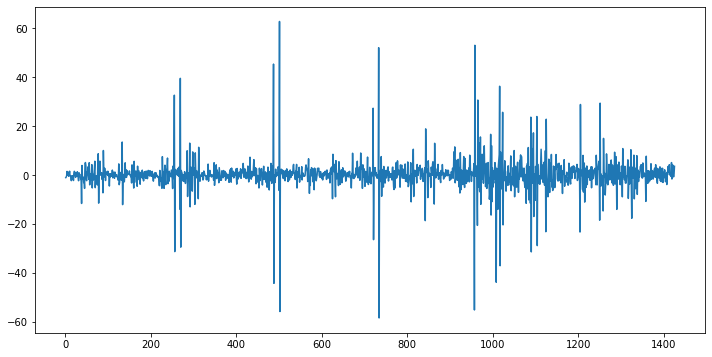

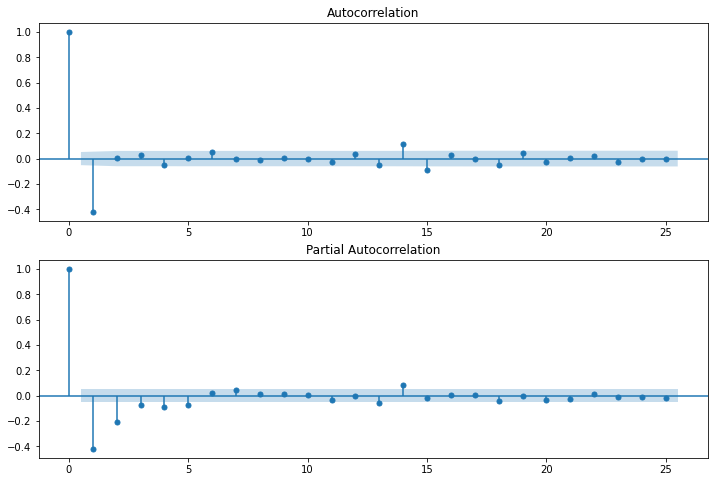

Количество лагов сильно отличных от 0 на первом графике: 2
Количество лагов сильно отличных от 0 на втором графике: 2
in1 = 1396
in2 = 1425


D:\Python381\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


D:\Python381\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note

                             ARIMA Model Results                              
Dep. Variable:                 D.OPEN   No. Observations:                 1395
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4451.023
Method:                       css-mle   S.D. of innovations              5.880
Date:                Thu, 22 Oct 2020   AIC                           8914.045
Time:                        23:21:52   BIC                           8945.489
Sample:                             1   HQIC                          8925.802
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1000      0.075      1.338      0.181      -0.047       0.247
ar.L1.D.OPEN     0.1167      1.330      0.088      0.930      -2.490       2.723
ar.L2.D.OPEN     0.0071      0.051      0.13

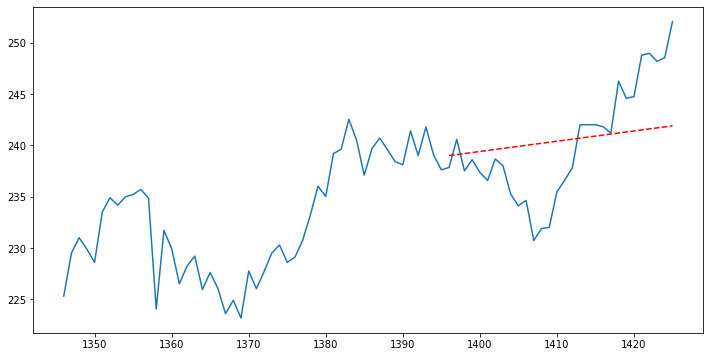

In [60]:
ex_df = d['SBER']['<OPEN>']
ex_df1 = ex_df[(ex_df.index > '2014-01-01') & (ex_df.index < '2020-01-01')]
func_ARIMA(ex_df1)

# Корреляция

**Корреляция** -  взаимозависимость  двух или нескольких случайных величин. Суть ее заключается в том, что при изменении значения одной переменной происходит закономерное изменение (уменьшению или увеличению) другой(-их) переменной(-ых).

Показатель корреляции. Коэффициент корреляции (r) характеризует величину отражающую степень взаимосвязи двух переменных между собой. Он может варьировать в пределах от -1 (отрицательная корреляция) до +1 (положительная корреляция). Если коэффициент корреляции равен 0 то, это говорит об отсутствии корреляционных связей между переменными. Причем если коэффициент корреляции ближе к 1 (или -1) то говориться о сильной корреляции, а если ближе к 0, то о слабой.

При положительной корреляции увеличение (или уменьшение) значений одной переменной ведет к закономерному увеличению (или уменьшению) другой переменной т.е. взаимосвязи типа увеличение-увеличение (уменьшение-уменьшение).

При отрицательной корреляции увеличение (или уменьшение) значений одной переменной ведет к закономерному уменьшению (или увеличению) другой переменной т.е. взаимосвязи типа увеличение-уменьшение (уменьшение-увеличение).